In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dts

In [25]:
sales = pd.read_excel('/content/sales.xlsx')
sales.head()

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash


In [26]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        4999 non-null   object        
 1   Customer ID     4999 non-null   object        
 2   Category        4999 non-null   object        
 3   Item            4484 non-null   object        
 4   Price           4757 non-null   float64       
 5   Quantity        4885 non-null   float64       
 6   Order Total     4885 non-null   float64       
 7   Order Date      4999 non-null   datetime64[ns]
 8   Payment Method  4701 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 351.6+ KB


In [27]:
sales.describe()

,Price,Quantity,Order Total,Order Date
count,4757.000000,4885.000000,4885.000000,4999
mean,6.568215,3.028045,20.103992,2022-12-31 14:42:19.227845632
min,1.000000,1.000000,1.000000,2022-01-01 00:00:00
25%,3.000000,2.000000,8.000000,2022-07-06 00:00:00
50%,5.000000,3.000000,15.000000,2022-12-30 00:00:00
75%,7.000000,4.000000,25.000000,2023-06-27 00:00:00
max,20.000000,5.000000,100.000000,2023-12-31 00:00:00
std,4.796941,1.415310,19.067809,NaN


In [28]:
#dropping the unnecessary column
sales=sales.drop(["Order ID"],axis=1)
sales

,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...
4994,CUST_080,Desserts,Chocolate Cake,6.0,2.0,12.0,2023-05-29,Credit Card
4995,CUST_053,Desserts,Fruit Salad,4.0,1.0,4.0,2023-03-26,Cash
4996,CUST_026,Starters,NaN,5.0,2.0,10.0,2022-12-17,Cash
4997,CUST_085,Desserts,Fruit Salad,4.0,3.0,12.0,2022-12-09,Digital Wallet


In [29]:
sales.isnull().sum()

,0
Customer ID,0
Category,0
Item,515
Price,242
Quantity,114
Order Total,114
Order Date,0
Payment Method,298


In [30]:
#fill null values
sales['Item'].fillna(sales['Item'].mode()[0],inplace=True)
sales['Price'].fillna(sales['Price'].mean(),inplace=True)
sales['Quantity'].fillna(sales['Quantity'].mean(),inplace=True)
sales['Order Total'].fillna(sales['Price'] * sales['Quantity'], inplace=True)
sales['Payment Method'].fillna(sales['Payment Method'].mode()[0],inplace=True)
sales

/tmp/ipython-input-604311226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales['Item'].fillna(sales['Item'].mode()[0],inplace=True)
/tmp/ipython-input-604311226.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,CUST_092,Side Dishes,Side Salad,3.000000,1.0,3.0,2023-12-21,Credit Card
1,CUST_021,Side Dishes,Mashed Potatoes,4.000000,3.0,12.0,2023-05-19,Digital Wallet
2,CUST_029,Main Dishes,Grilled Chicken,15.000000,4.0,60.0,2023-09-27,Credit Card
3,CUST_075,Drinks,Side Salad,6.568215,2.0,5.0,2022-08-09,Credit Card
4,CUST_031,Main Dishes,Pasta Alfredo,12.000000,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...
4994,CUST_080,Desserts,Chocolate Cake,6.000000,2.0,12.0,2023-05-29,Credit Card
4995,CUST_053,Desserts,Fruit Salad,4.000000,1.0,4.0,2023-03-26,Cash
4996,CUST_026,Starters,Side Salad,5.000000,2.0,10.0,2022-12-17,Cash
4997,CUST_085,Desserts,Fruit Salad,4.000000,3.0,12.0,2022-12-09,Digital Wallet


In [31]:
sales.isnull().sum()

,0
Customer ID,0
Category,0
Item,0
Price,0
Quantity,0
Order Total,0
Order Date,0
Payment Method,0


In [32]:
sales.dtypes


,0
Customer ID,object
Category,object
Item,object
Price,float64
Quantity,float64
Order Total,float64
Order Date,datetime64[ns]
Payment Method,object


In [33]:
sales['Price']=sales['Price'].astype(int)
sales['Quantity']=sales['Quantity'].astype(int)
sales['Order Total']=sales['Order Total'].astype(int)
sales.dtypes

,0
Customer ID,object
Category,object
Item,object
Price,int64
Quantity,int64
Order Total,int64
Order Date,datetime64[ns]
Payment Method,object


In [34]:
#Creating Time-Based Columns
sales['Year'] = sales['Order Date'].dt.year
sales['Month'] = sales['Order Date'].dt.month_name()
sales['Day'] = sales['Order Date'].dt.day
sales['Weekday'] = sales['Order Date'].dt.day_name()
sales


,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method,Year,Month,Day,Weekday
0,CUST_092,Side Dishes,Side Salad,3,1,3,2023-12-21,Credit Card,2023,December,21,Thursday
1,CUST_021,Side Dishes,Mashed Potatoes,4,3,12,2023-05-19,Digital Wallet,2023,May,19,Friday
2,CUST_029,Main Dishes,Grilled Chicken,15,4,60,2023-09-27,Credit Card,2023,September,27,Wednesday
3,CUST_075,Drinks,Side Salad,6,2,5,2022-08-09,Credit Card,2022,August,9,Tuesday
4,CUST_031,Main Dishes,Pasta Alfredo,12,4,48,2022-05-15,Cash,2022,May,15,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
4994,CUST_080,Desserts,Chocolate Cake,6,2,12,2023-05-29,Credit Card,2023,May,29,Monday
4995,CUST_053,Desserts,Fruit Salad,4,1,4,2023-03-26,Cash,2023,March,26,Sunday
4996,CUST_026,Starters,Side Salad,5,2,10,2022-12-17,Cash,2022,December,17,Saturday
4997,CUST_085,Desserts,Fruit Salad,4,3,12,2022-12-09,Digital Wallet,2022,December,9,Friday


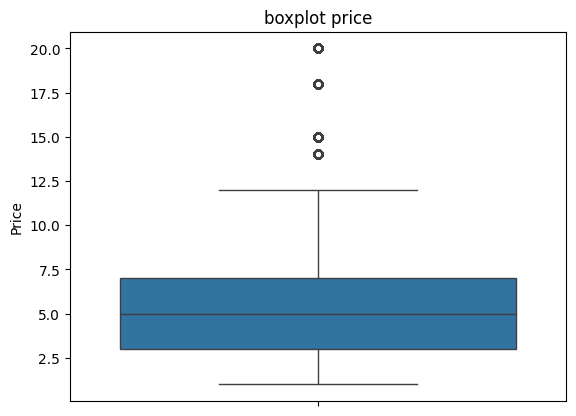

In [35]:
sns.boxplot(data= sales["Price"])
plt.title("boxplot price")
plt.show()

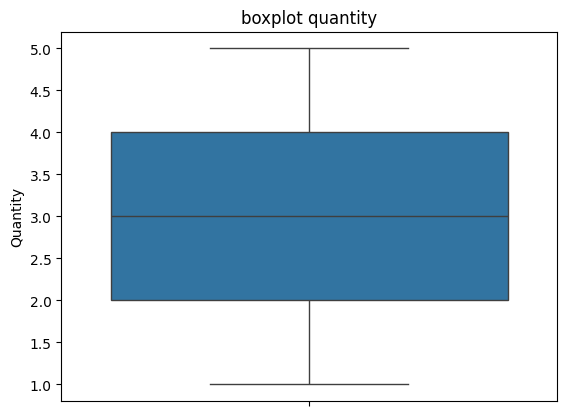

In [36]:
sns.boxplot(data= sales["Quantity"])
plt.title("boxplot quantity")
plt.show()

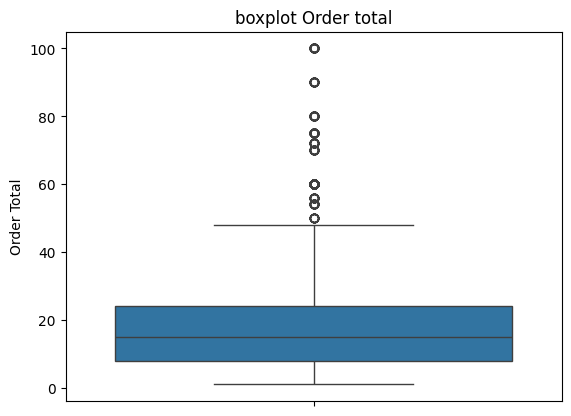

In [37]:
sns.boxplot(data= sales["Order Total"])
plt.title("boxplot Order total")
plt.show()

/tmp/ipython-input-3014146612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales, x='Category', palette='pastel')


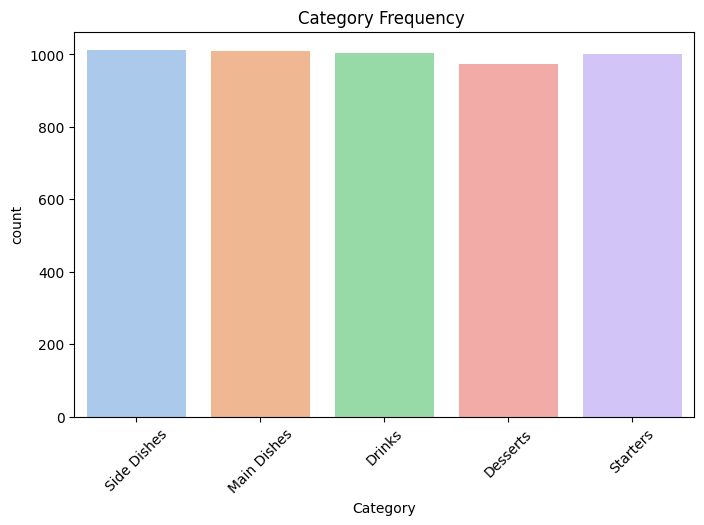

In [38]:
#Univariate analysis
plt.figure(figsize=(8,5))
sns.countplot(data=sales, x='Category', palette='pastel')
plt.title("Category Frequency ")
plt.xticks(rotation=45)
plt.show()


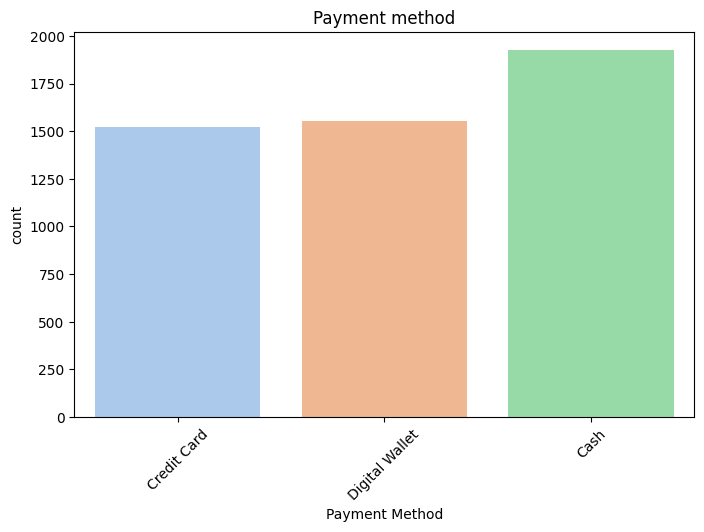

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(data=sales, x='Payment Method', palette='pastel', hue='Payment Method', legend=False)
plt.title("Payment method")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-12836764.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.countplot(data=sales, x='Month', order=pd.date_range("2000-01-01","2000-12-31", freq="M").strftime("%B"))


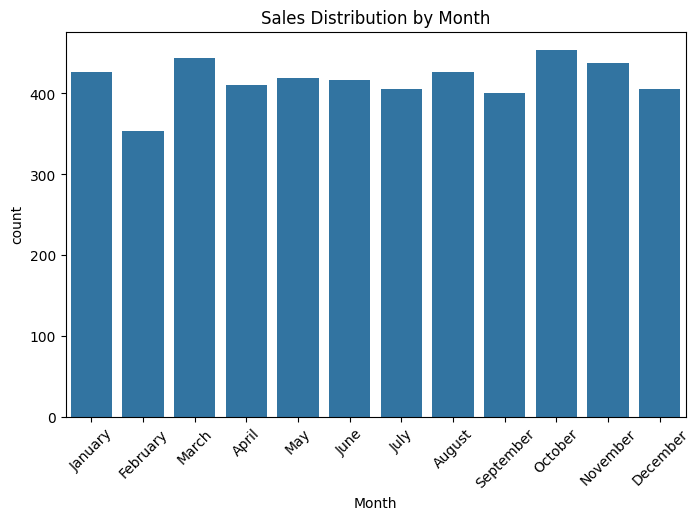

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(data=sales, x='Month', order=pd.date_range("2000-01-01","2000-12-31", freq="M").strftime("%B"))
plt.title("Sales Distribution by Month")
plt.xticks(rotation=45)
plt.show()

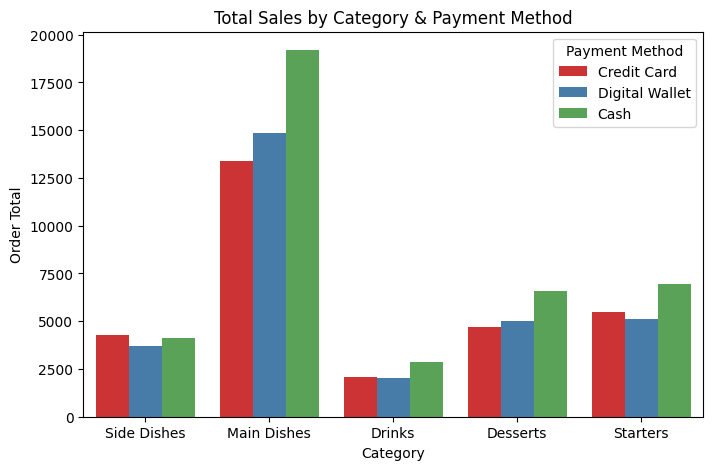

In [41]:
#Bivariate analysis
plt.figure(figsize=(8,5))
sns.barplot(data=sales, x='Category', y='Order Total', hue='Payment Method', estimator='sum', errorbar=None, palette='Set1')
plt.title("Total Sales by Category & Payment Method")
plt.show()

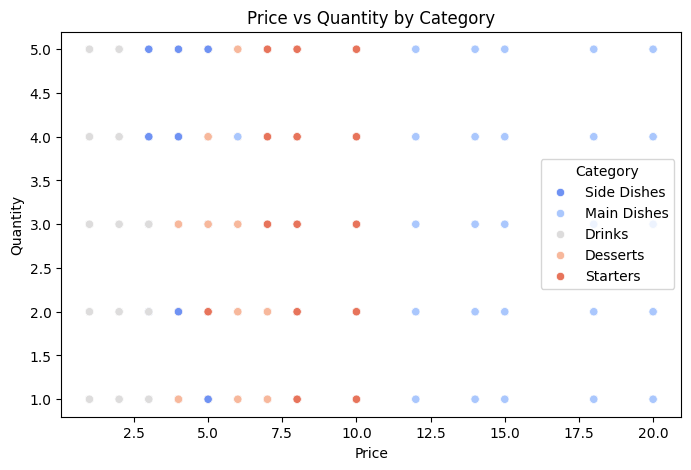

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=sales, x='Price', y='Quantity', hue='Category', palette='coolwarm')
plt.title("Price vs Quantity by Category")
plt.show()


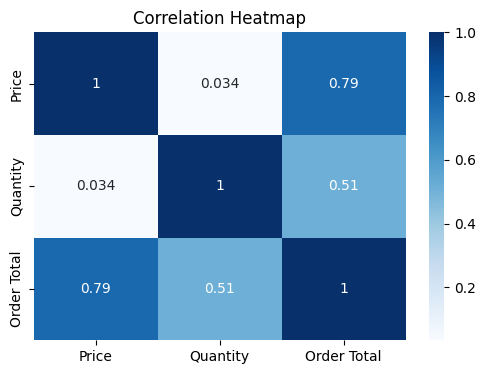

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(sales[['Price', 'Quantity', 'Order Total']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


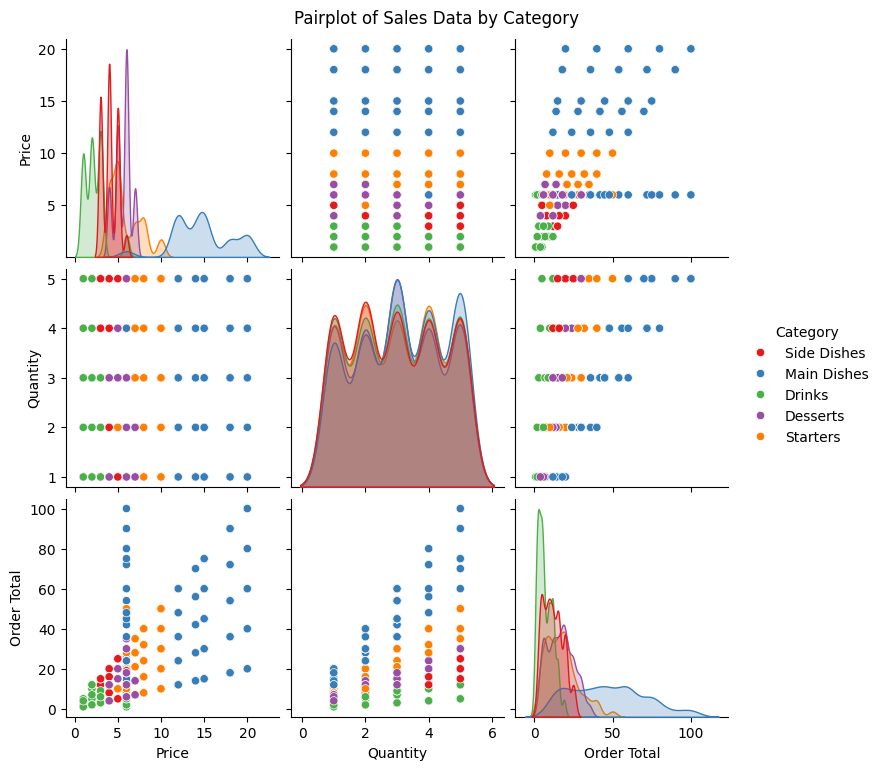

In [44]:
sns.pairplot(sales, vars=['Price', 'Quantity', 'Order Total'], hue='Category', palette='Set1', diag_kind='kde')
plt.suptitle("Pairplot of Sales Data by Category", y=1.02)
plt.show()


In [45]:
#RUN T-TEST

from scipy import stats
top2 = sales['Category'].value_counts().nlargest(2).index.tolist()
cat1 = sales[sales['Category'] == top2[0]]['Order Total'].dropna()
cat2 = sales[sales['Category'] == top2[1]]['Order Total'].dropna()
print(f"Comparing: {top2[0]} vs {top2[1]}")
if len(cat1) > 1 and len(cat2) > 1:
    t_stat, p_val = stats.ttest_ind(cat1, cat2, equal_var=False)
    print("T-statistic:", t_stat)
    print("P-value:", p_val)
    if p_val < 0.05:
        print("Reject Null Hypothesis")
    else:
        print("Fail to Reject Null Hypothesis")
else:
    print("Not enough data in one of the top categories.")


Comparing: Side Dishes vs Main Dishes
T-statistic: -45.555398016359156
P-value: 1.6052848907485471e-259
Reject Null Hypothesis


In [46]:
# Run ANOVA
from scipy.stats import f_oneway
groups = [group['Order Total'].dropna() for name, group in sales.groupby('Category') if len(group) > 1]
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis.")




F-statistic: 1556.16, p-value: 0.0000
Reject Null Hypothesis
